# Profitability - Group Project on Stock Price Movement

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron

## CLEANING

In [2]:
clean_data = pd.read_csv('final_merged_data.csv',index_col = 0)
clean_data.head()

,symbol,date,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,Cash and Cash Equivalents,...,Estimated Shares Outstanding,open,close,low,high,volume,GICS Sector,GICS Sub Industry,PE,trend
0,AAL,2012-12-31,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,1.330000e+09,...,3.350000e+08,12.850000,13.500000,12.840000,13.680000,7005600.0,5,4,-2.410714,0.0
1,AAL,2013-12-31,4.975000e+09,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,2.175000e+09,...,1.630222e+08,24.740000,25.250000,24.629999,25.250000,7166600.0,5,4,-2.244444,0.0
2,AAL,2014-12-31,4.668000e+09,-160000000.0,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,60.0,1.768000e+09,...,7.169154e+08,53.900002,53.630001,53.320000,54.639999,10626000.0,5,4,13.340796,1.0
3,AAL,2015-12-31,5.102000e+09,352000000.0,-7.080000e+08,135.0,-6.151000e+09,1.159100e+10,51.0,1.085000e+09,...,6.681299e+08,42.540001,42.349998,41.830002,42.570000,6788900.0,5,4,3.718174,1.0
4,ABBV,2013-12-31,6.448000e+09,681000000.0,-5.400000e+07,92.0,-4.910000e+08,3.671000e+09,144.0,9.595000e+09,...,1.600000e+09,52.990002,52.810001,52.360001,53.060001,3019700.0,4,87,20.468993,1.0


In [3]:
clean_data.columns

Index(['symbol', 'date', 'Accounts Payable', 'Accounts Receivable',
       'Add'l income/expense items', 'After Tax ROE', 'Capital Expenditures',
       'Capital Surplus', 'Cash Ratio', 'Cash and Cash Equivalents',
       'Changes in Inventories', 'Common Stocks', 'Cost of Revenue',
       'Current Ratio', 'Deferred Asset Charges', 'Deferred Liability Charges',
       'Depreciation', 'Earnings Before Interest and Tax',
       'Earnings Before Tax', 'Effect of Exchange Rate', 'Fixed Assets',
       'Goodwill', 'Gross Margin', 'Gross Profit', 'Income Tax',
       'Intangible Assets', 'Interest Expense', 'Inventory', 'Investments',
       'Liabilities', 'Long-Term Debt', 'Long-Term Investments',
       'Minority Interest', 'Misc. Stocks', 'Net Borrowings', 'Net Cash Flow',
       'Net Cash Flow-Operating', 'Net Cash Flows-Financing',
       'Net Cash Flows-Investing', 'Net Income', 'Net Income Adjustments',
       'Net Income Applicable to Common Shareholders',
       'Net Income-Cont. Op

In [4]:
#import category_encoders as ce
#ohe = ce.OneHotEncoder(handle_unknown='ignore', use_cat_names=True)
#clean_data = ohe.fit_transform(clean_data)

In [5]:
clean_data.drop(['symbol'], axis=1,inplace=True)
clean_data.drop(['date'], axis=1,inplace=True)
#drop PE and columns directly related to profitability
clean_data.drop(['PE'], axis=1,inplace=True)
clean_data.drop(['Earnings Per Share'], axis=1,inplace=True)

In [6]:
clean_data.head()

,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,Cash and Cash Equivalents,Changes in Inventories,Common Stocks,...,For Year,Estimated Shares Outstanding,open,close,low,high,volume,GICS Sector,GICS Sub Industry,trend
0,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,1.330000e+09,0.0,127000000.0,...,2012,3.350000e+08,12.850000,13.500000,12.840000,13.680000,7005600.0,5,4,0.0
1,4.975000e+09,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,2.175000e+09,0.0,5000000.0,...,2013,1.630222e+08,24.740000,25.250000,24.629999,25.250000,7166600.0,5,4,0.0
2,4.668000e+09,-160000000.0,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,60.0,1.768000e+09,0.0,7000000.0,...,2014,7.169154e+08,53.900002,53.630001,53.320000,54.639999,10626000.0,5,4,1.0
3,5.102000e+09,352000000.0,-7.080000e+08,135.0,-6.151000e+09,1.159100e+10,51.0,1.085000e+09,0.0,6000000.0,...,2015,6.681299e+08,42.540001,42.349998,41.830002,42.570000,6788900.0,5,4,1.0
4,6.448000e+09,681000000.0,-5.400000e+07,92.0,-4.910000e+08,3.671000e+09,144.0,9.595000e+09,-56000000.0,16000000.0,...,2013,1.600000e+09,52.990002,52.810001,52.360001,53.060001,3019700.0,4,87,1.0


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(clean_data.loc[:, clean_data.columns != 'trend'], clean_data['trend'], test_size=0.30, random_state=42)

## Logistic Regression

In [8]:
#lbfgs would not converge
#For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones.

logreg = LogisticRegression(solver='liblinear', max_iter=1000)
log_model = logreg.fit(X_train, Y_train)

log_Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
test_acc_log = round(logreg.score(X_test, Y_test) * 100, 2)

# Print roc_auc_score
print("Accuracy score (training):",acc_log)
print("Accuracy score (test):",test_acc_log)

Accuracy score (training): 94.94
Accuracy score (test): 90.93


In [9]:
from sklearn.metrics import f1_score, roc_auc_score

model=logreg

train_predictions = model.predict(X_train)

train_accuracy = roc_auc_score(Y_train, train_predictions)
train_error_rate = 1 - train_accuracy
test_accuracy = roc_auc_score(Y_test, log_Y_pred)
test_error_rate = 1 - test_accuracy
print('ROC Train Accuracy: {:.2f} | ROC Train Error: {:.2f}'.format(train_accuracy, train_error_rate))
print('ROC Test Accuracy: {:.2f} | ROC Test Error: {:.2f}'.format(test_accuracy, test_error_rate))

#error test > error train => OVER FITTING of the data.
#error test < error train => UNDER FITTING of the data

print('OVERFIT:',test_error_rate > train_error_rate)
print('UNDERFIT:',test_error_rate < train_error_rate)

from sklearn.metrics import classification_report
print(classification_report(Y_test, log_Y_pred))

from sklearn import metrics

log_f1 = f1_score(Y_test,log_Y_pred)

print('F1:',log_f1)

ROC Train Accuracy: 0.83 | ROC Train Error: 0.17
ROC Test Accuracy: 0.76 | ROC Test Error: 0.24
OVERFIT: True
UNDERFIT: False
              precision    recall  f1-score   support

         0.0       0.56      0.57      0.56        42
         1.0       0.95      0.95      0.95       366

   micro avg       0.91      0.91      0.91       408
   macro avg       0.75      0.76      0.76       408
weighted avg       0.91      0.91      0.91       408

F1: 0.9493844049247606


## K-Nearest Neighbors

In [10]:
knn = KNeighborsClassifier() 
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [11]:
from sklearn.model_selection import GridSearchCV

param_grid = { 
    'n_neighbors': [2, 5, 10, 50, 100],
    'p' : [1, 2],
    'leaf_size' :[30,50]
}

knn_CV = GridSearchCV(estimator=knn, param_grid=param_grid, cv= 10, n_jobs=-1)
knn_CV.fit(X_train, Y_train)

print(knn_CV.best_params_)
print(knn_CV.best_score_)

{'leaf_size': 30, 'n_neighbors': 5, 'p': 1}
0.8914646996838778


In [12]:
knn = KNeighborsClassifier(leaf_size=30, n_neighbors=5, p=1) 
knn_model = knn.fit(X_train, Y_train)  
knn_Y_pred = knn.predict(X_test)  

acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
test_acc_knn = round(knn.score(X_test, Y_test) * 100, 2)

# Print roc_auc_score
print("Accuracy score (training):",acc_knn)
print("Accuracy score (test):",test_acc_knn)

Accuracy score (training): 92.1
Accuracy score (test): 90.93


In [13]:
from sklearn.metrics import f1_score, roc_auc_score

model=knn

train_predictions = model.predict(X_train)

train_accuracy = roc_auc_score(Y_train, train_predictions)
train_error_rate = 1 - train_accuracy
test_accuracy = roc_auc_score(Y_test, knn_Y_pred)
test_error_rate = 1 - test_accuracy
print('ROC Train Accuracy: {:.2f} | ROC Train Error: {:.2f}'.format(train_accuracy, train_error_rate))
print('ROC Test Accuracy: {:.2f} | ROC Test Error: {:.2f}'.format(test_accuracy, test_error_rate))

#error test > error train => OVER FITTING of the data.
#error test < error train => UNDER FITTING of the data

print('OVERFIT:',test_error_rate > train_error_rate)
print('UNDERFIT:',test_error_rate < train_error_rate)

from sklearn.metrics import classification_report
print(classification_report(Y_test, knn_Y_pred))

from sklearn import metrics

knn_f1 = f1_score(Y_test,knn_Y_pred)

print('F1:',knn_f1)

ROC Train Accuracy: 0.70 | ROC Train Error: 0.30
ROC Test Accuracy: 0.60 | ROC Test Error: 0.40
OVERFIT: True
UNDERFIT: False
              precision    recall  f1-score   support

         0.0       0.69      0.21      0.33        42
         1.0       0.92      0.99      0.95       366

   micro avg       0.91      0.91      0.91       408
   macro avg       0.80      0.60      0.64       408
weighted avg       0.89      0.91      0.89       408

F1: 0.9513797634691196


## Gaussian Naive Bayes

In [14]:
gaussian = GaussianNB()
gaussian_model = gaussian.fit(X_train, Y_train) 

gaussian_Y_pred = gaussian.predict(X_test)  

acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
test_acc_gaussian = round(gaussian.score(X_test, Y_test) * 100, 2)

# Print roc_auc_score
print("Accuracy score (training):",acc_gaussian)
print("Accuracy score (test):",test_acc_gaussian)

Accuracy score (training): 30.24
Accuracy score (test): 23.77


In [15]:
from sklearn.metrics import f1_score, roc_auc_score

model=gaussian

train_predictions = model.predict(X_train)

train_accuracy = roc_auc_score(Y_train, train_predictions)
train_error_rate = 1 - train_accuracy
test_accuracy = roc_auc_score(Y_test, gaussian_Y_pred)
test_error_rate = 1 - test_accuracy
print('ROC Train Accuracy: {:.2f} | ROC Train Error: {:.2f}'.format(train_accuracy, train_error_rate))
print('ROC Test Accuracy: {:.2f} | ROC Test Error: {:.2f}'.format(test_accuracy, test_error_rate))

#error test > error train => OVER FITTING of the data.
#error test < error train => UNDER FITTING of the data

print('OVERFIT:',test_error_rate > train_error_rate)
print('UNDERFIT:',test_error_rate < train_error_rate)

from sklearn.metrics import classification_report
print(classification_report(Y_test, gaussian_Y_pred))

gaussian_f1 = f1_score(Y_test,gaussian_Y_pred)

from sklearn import metrics
print('F1:',gaussian_f1)

ROC Train Accuracy: 0.57 | ROC Train Error: 0.43
ROC Test Accuracy: 0.55 | ROC Test Error: 0.45
OVERFIT: True
UNDERFIT: False
              precision    recall  f1-score   support

         0.0       0.11      0.95      0.20        42
         1.0       0.97      0.16      0.27       366

   micro avg       0.24      0.24      0.24       408
   macro avg       0.54      0.55      0.24       408
weighted avg       0.88      0.24      0.26       408

F1: 0.26823529411764707


## Support Vector Classifier (SVC)

In [16]:
svc = SVC(kernel='rbf', gamma='auto')
svc_model = svc.fit(X_train, Y_train)

svc_Y_pred = svc.predict(X_test)

acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
test_acc_svc = round(svc.score(X_test, Y_test) * 100, 2)

# Print roc_auc_score
print("Accuracy score (training):",acc_svc)
print("Accuracy score (test):",test_acc_svc)

Accuracy score (training): 100.0
Accuracy score (test): 89.71


In [17]:
from sklearn.metrics import f1_score, roc_auc_score

model=svc

train_predictions = model.predict(X_train)

train_accuracy = roc_auc_score(Y_train, train_predictions)
train_error_rate = 1 - train_accuracy
test_accuracy = roc_auc_score(Y_test, svc_Y_pred)
test_error_rate = 1 - test_accuracy
print('ROC Train Accuracy: {:.2f} | ROC Train Error: {:.2f}'.format(train_accuracy, train_error_rate))
print('ROC Test Accuracy: {:.2f} | ROC Test Error: {:.2f}'.format(test_accuracy, test_error_rate))

#error test > error train => OVER FITTING of the data.
#error test < error train => UNDER FITTING of the data

print('OVERFIT:',test_error_rate > train_error_rate)
print('UNDERFIT:',test_error_rate < train_error_rate)

from sklearn.metrics import classification_report
print(classification_report(Y_test, svc_Y_pred))

svc_f1 = f1_score(Y_test,svc_Y_pred)

from sklearn import metrics
print('F1:',svc_f1)

ROC Train Accuracy: 1.00 | ROC Train Error: 0.00
ROC Test Accuracy: 0.50 | ROC Test Error: 0.50
OVERFIT: True
UNDERFIT: False
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        42
         1.0       0.90      1.00      0.95       366

   micro avg       0.90      0.90      0.90       408
   macro avg       0.45      0.50      0.47       408
weighted avg       0.80      0.90      0.85       408

F1: 0.9457364341085273


C:\Users\Sasha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sasha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Sasha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Decision Trees

In [18]:
decision_tree = DecisionTreeClassifier() 
decision_tree.get_params().keys()

dict_keys(['class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'presort', 'random_state', 'splitter'])

In [19]:
from sklearn.model_selection import GridSearchCV

depths = np.arange(1, 21)

param_grid = { 
    'criterion': ['gini', 'entropy'],
    'max_depth' : depths,
    'min_samples_leaf' :[1, 5, 10, 20, 50, 100]
}

decision_tree_CV = GridSearchCV(estimator=decision_tree, param_grid=param_grid, cv= 10, n_jobs=-1)
decision_tree_CV.fit(X_train, Y_train)

print(decision_tree_CV.best_params_)
print(decision_tree_CV.best_score_)

{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1}
1.0


In [20]:
decision_tree = DecisionTreeClassifier(criterion='gini', max_depth=2, min_samples_leaf=1) 
decision_tree_model = decision_tree.fit(X_train, Y_train)  
decision_tree_Y_pred = decision_tree.predict(X_test)  

acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
test_acc_decision_tree = round(decision_tree.score(X_test, Y_test) * 100, 2)

# Print roc_auc_score
print("Accuracy score (training):",acc_decision_tree)
print("Accuracy score (test):",test_acc_decision_tree)

Accuracy score (training): 100.0
Accuracy score (test): 99.51


In [21]:
from sklearn.metrics import f1_score, roc_auc_score

model=decision_tree

train_predictions = model.predict(X_train)

train_accuracy = roc_auc_score(Y_train, train_predictions)
train_error_rate = 1 - train_accuracy
test_accuracy = roc_auc_score(Y_test, decision_tree_Y_pred)
test_error_rate = 1 - test_accuracy
print('ROC Train Accuracy: {:.2f} | ROC Train Error: {:.2f}'.format(train_accuracy, train_error_rate))
print('ROC Test Accuracy: {:.2f} | ROC Test Error: {:.2f}'.format(test_accuracy, test_error_rate))

#error test > error train => OVER FITTING of the data.
#error test < error train => UNDER FITTING of the data

print('OVERFIT:',test_error_rate > train_error_rate)
print('UNDERFIT:',test_error_rate < train_error_rate)

from sklearn.metrics import classification_report
print(classification_report(Y_test, decision_tree_Y_pred))

dt_f1 = f1_score(Y_test,decision_tree_Y_pred)

from sklearn import metrics
print('F1:',dt_f1)

ROC Train Accuracy: 1.00 | ROC Train Error: 0.00
ROC Test Accuracy: 0.99 | ROC Test Error: 0.01
OVERFIT: True
UNDERFIT: False
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98        42
         1.0       1.00      1.00      1.00       366

   micro avg       1.00      1.00      1.00       408
   macro avg       0.99      0.99      0.99       408
weighted avg       1.00      1.00      1.00       408

F1: 0.9972677595628415


## Ensemble Methods

### AdaBoost

In [22]:
decision_tree = DecisionTreeClassifier()
ada = AdaBoostClassifier(base_estimator=decision_tree, n_estimators=180, random_state=1)
ada_model = ada.fit(X_train, Y_train)

ada_Y_pred = ada.predict(X_test)

acc_ada = round(ada.score(X_train, Y_train) * 100, 2)
test_acc_ada = round(ada.score(X_test, Y_test) * 100, 2)

# Print roc_auc_score
print("Accuracy score (training):",acc_ada)
print("Accuracy score (test):",test_acc_ada)

Accuracy score (training): 100.0
Accuracy score (test): 99.51


In [23]:
from sklearn.metrics import f1_score, roc_auc_score

model=ada

train_predictions = model.predict(X_train)

train_accuracy = roc_auc_score(Y_train, train_predictions)
train_error_rate = 1 - train_accuracy
test_accuracy = roc_auc_score(Y_test, ada_Y_pred)
test_error_rate = 1 - test_accuracy
print('ROC Train Accuracy: {:.2f} | ROC Train Error: {:.2f}'.format(train_accuracy, train_error_rate))
print('ROC Test Accuracy: {:.2f} | ROC Test Error: {:.2f}'.format(test_accuracy, test_error_rate))

#error test > error train => OVER FITTING of the data.
#error test < error train => UNDER FITTING of the data

print('OVERFIT:',test_error_rate > train_error_rate)
print('UNDERFIT:',test_error_rate < train_error_rate)

from sklearn.metrics import classification_report
print(classification_report(Y_test, ada_Y_pred))

ada_f1 = f1_score(Y_test,ada_Y_pred)

from sklearn import metrics
print('F1:',ada_f1)

ROC Train Accuracy: 1.00 | ROC Train Error: 0.00
ROC Test Accuracy: 0.99 | ROC Test Error: 0.01
OVERFIT: True
UNDERFIT: False
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98        42
         1.0       1.00      1.00      1.00       366

   micro avg       1.00      1.00      1.00       408
   macro avg       0.99      0.99      0.99       408
weighted avg       1.00      1.00      1.00       408

F1: 0.9972677595628415


### Gradient Tree Boosting

In [24]:
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(n_estimators=20, learning_rate = learning_rate, max_features=2, max_depth = 2, random_state = 0)
    gt_model = gb.fit(X_train, Y_train)
    
    acc_gb = round(gb.score(X_train, Y_train) * 100, 2)
    test_acc_gb = round(gb.score(X_test, Y_test) * 100, 2)
    
    gb_Y_pred = gb.predict(X_test)
    
print("Learning rate: ", learning_rate)
print("Accuracy score (training):",acc_gb)
print("Accuracy score (test):",test_acc_gb)

Learning rate:  1
Accuracy score (training): 100.0
Accuracy score (test): 97.79


In [25]:
from sklearn.metrics import f1_score, roc_auc_score

model=gb

train_predictions = model.predict(X_train)

train_accuracy = roc_auc_score(Y_train, train_predictions)
train_error_rate = 1 - train_accuracy
test_accuracy = roc_auc_score(Y_test, gb_Y_pred)
test_error_rate = 1 - test_accuracy
print('ROC Train Accuracy: {:.2f} | ROC Train Error: {:.2f}'.format(train_accuracy, train_error_rate))
print('ROC Test Accuracy: {:.2f} | ROC Test Error: {:.2f}'.format(test_accuracy, test_error_rate))

#error test > error train => OVER FITTING of the data.
#error test < error train => UNDER FITTING of the data

print('OVERFIT:',test_error_rate > train_error_rate)
print('UNDERFIT:',test_error_rate < train_error_rate)

from sklearn.metrics import classification_report
print(classification_report(Y_test, gb_Y_pred))

gb_f1 = f1_score(Y_test,gb_Y_pred)

from sklearn import metrics
print('F1:',gb_f1)

ROC Train Accuracy: 1.00 | ROC Train Error: 0.00
ROC Test Accuracy: 0.97 | ROC Test Error: 0.03
OVERFIT: True
UNDERFIT: False
              precision    recall  f1-score   support

         0.0       0.85      0.95      0.90        42
         1.0       0.99      0.98      0.99       366

   micro avg       0.98      0.98      0.98       408
   macro avg       0.92      0.97      0.94       408
weighted avg       0.98      0.98      0.98       408

F1: 0.9876203576341127


### Random Forest

In [26]:
random_forest = RandomForestClassifier()
random_forest.get_params().keys()

dict_keys(['bootstrap', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [27]:
from sklearn.model_selection import GridSearchCV

depths = np.arange(1, 21)

param_grid = { 
    'n_estimators': [100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : depths,
    'criterion' :['gini', 'entropy']
}

rf_CV = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv= 5, n_jobs=-1)
rf_CV.fit(X_train, Y_train)

print(rf_CV.best_params_)
print(rf_CV.best_score_)

{'criterion': 'gini', 'max_depth': 7, 'max_features': 'auto', 'n_estimators': 200}
0.9989462592202318


In [28]:
random_forest = RandomForestClassifier(criterion='gini', max_depth=7, max_features='auto', n_estimators=200)
random_forest_model = random_forest.fit(X_train, Y_train)

random_Y_pred = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
test_acc_random_forest = round(random_forest.score(X_test, Y_test) * 100, 2)

# Print roc_auc_score
print("Accuracy score (training):",acc_random_forest)
print("Accuracy score (test):",test_acc_random_forest)

Accuracy score (training): 100.0
Accuracy score (test): 99.26


In [29]:
from sklearn.metrics import f1_score, roc_auc_score

model=random_forest

train_predictions = model.predict(X_train)

train_accuracy = roc_auc_score(Y_train, train_predictions)
train_error_rate = 1 - train_accuracy
test_accuracy = roc_auc_score(Y_test, random_Y_pred)
test_error_rate = 1 - test_accuracy
print('ROC Train Accuracy: {:.2f} | ROC Train Error: {:.2f}'.format(train_accuracy, train_error_rate))
print('ROC Test Accuracy: {:.2f} | ROC Test Error: {:.2f}'.format(test_accuracy, test_error_rate))

#error test > error train => OVER FITTING of the data.
#error test < error train => UNDER FITTING of the data

print('OVERFIT:',test_error_rate > train_error_rate)
print('UNDERFIT:',test_error_rate < train_error_rate)

from sklearn.metrics import classification_report
print(classification_report(Y_test, random_Y_pred))

rf_f1 = f1_score(Y_test,random_Y_pred)

from sklearn import metrics
print('F1:',rf_f1)

ROC Train Accuracy: 1.00 | ROC Train Error: 0.00
ROC Test Accuracy: 1.00 | ROC Test Error: 0.00
OVERFIT: True
UNDERFIT: False
              precision    recall  f1-score   support

         0.0       0.93      1.00      0.97        42
         1.0       1.00      0.99      1.00       366

   micro avg       0.99      0.99      0.99       408
   macro avg       0.97      1.00      0.98       408
weighted avg       0.99      0.99      0.99       408

F1: 0.9958847736625513


In [30]:
# Feature Importance
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
Estimated Shares Outstanding,0.270
Net Income,0.102
Net Income Applicable to Common Shareholders,0.100
Earnings Before Tax,0.071
Earnings Before Interest and Tax,0.064
Net Income-Cont. Operations,0.061
Operating Income,0.029
Income Tax,0.017
Non-Recurring Items,0.013


## Stochastic Gradient Descent (SGD)

In [31]:
sgd = linear_model.SGDClassifier()
sgd.get_params().keys()

dict_keys(['alpha', 'average', 'class_weight', 'early_stopping', 'epsilon', 'eta0', 'fit_intercept', 'l1_ratio', 'learning_rate', 'loss', 'max_iter', 'n_iter', 'n_iter_no_change', 'n_jobs', 'penalty', 'power_t', 'random_state', 'shuffle', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [33]:
from sklearn.model_selection import GridSearchCV

param_grid = { 
    'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'],
    'penalty': ['l1', 'l2'],
}

sgd_CV = GridSearchCV(estimator=sgd, param_grid=param_grid, cv= 5, n_jobs=-1)
sgd_CV.fit(X_train, Y_train)

print(sgd_CV.best_params_)
print(sgd_CV.best_score_)

{'loss': 'hinge', 'penalty': 'l1'}
0.863013698630137


C:\Users\Sasha\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Sasha\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


In [34]:
sgd = linear_model.SGDClassifier(loss='hinge', penalty='l1',max_iter=1000)
sgd_model = sgd.fit(X_train, Y_train)
sgd_Y_pred = sgd.predict(X_test)

sgd.score(X_train, Y_train)

acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
test_acc_sgd = round(sgd.score(X_test, Y_test) * 100, 2)

# Print roc_auc_score
print("Accuracy score (training):",acc_sgd)
print("Accuracy score (test):",test_acc_sgd)

Accuracy score (training): 89.04
Accuracy score (test): 88.24


In [35]:
from sklearn.metrics import f1_score, roc_auc_score

model=sgd

train_predictions = model.predict(X_train)

train_accuracy = roc_auc_score(Y_train, train_predictions)
train_error_rate = 1 - train_accuracy
test_accuracy = roc_auc_score(Y_test, sgd_Y_pred)
test_error_rate = 1 - test_accuracy
print('ROC Train Accuracy: {:.2f} | ROC Train Error: {:.2f}'.format(train_accuracy, train_error_rate))
print('ROC Test Accuracy: {:.2f} | ROC Test Error: {:.2f}'.format(test_accuracy, test_error_rate))

#error test > error train => OVER FITTING of the data.
#error test < error train => UNDER FITTING of the data

print('OVERFIT:',test_error_rate > train_error_rate)
print('UNDERFIT:',test_error_rate < train_error_rate)

from sklearn.metrics import classification_report
print(classification_report(Y_test, sgd_Y_pred))

sgd_f1 = f1_score(Y_test,sgd_Y_pred)

from sklearn import metrics
print('F1:',sgd_f1)

ROC Train Accuracy: 0.74 | ROC Train Error: 0.26
ROC Test Accuracy: 0.68 | ROC Test Error: 0.32
OVERFIT: True
UNDERFIT: False
              precision    recall  f1-score   support

         0.0       0.43      0.43      0.43        42
         1.0       0.93      0.93      0.93       366

   micro avg       0.88      0.88      0.88       408
   macro avg       0.68      0.68      0.68       408
weighted avg       0.88      0.88      0.88       408

F1: 0.9344262295081968


## Perceptron

In [36]:
perceptron = Perceptron(max_iter=5)
perceptron_model = perceptron.fit(X_train, Y_train)

perceptron_Y_pred = perceptron.predict(X_test)

acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
test_acc_perceptron = round(perceptron.score(X_test, Y_test) * 100, 2)

# Print roc_auc_score
print("Accuracy score (training):",acc_perceptron)
print("Accuracy score (test):",test_acc_perceptron)

Accuracy score (training): 88.2
Accuracy score (test): 89.71


In [37]:
from sklearn.metrics import f1_score, roc_auc_score

model=perceptron

train_predictions = model.predict(X_train)

train_accuracy = roc_auc_score(Y_train, train_predictions)
train_error_rate = 1 - train_accuracy
test_accuracy = roc_auc_score(Y_test, perceptron_Y_pred)
test_error_rate = 1 - test_accuracy
print('ROC Train Accuracy: {:.2f} | ROC Train Error: {:.2f}'.format(train_accuracy, train_error_rate))
print('ROC Test Accuracy: {:.2f} | ROC Test Error: {:.2f}'.format(test_accuracy, test_error_rate))

#error test > error train => OVER FITTING of the data.
#error test < error train => UNDER FITTING of the data

print('OVERFIT:',test_error_rate > train_error_rate)
print('UNDERFIT:',test_error_rate < train_error_rate)

from sklearn.metrics import classification_report
print(classification_report(Y_test, perceptron_Y_pred))

perceptron_f1 = f1_score(Y_test,perceptron_Y_pred)

from sklearn import metrics
print('F1:',perceptron_f1)

ROC Train Accuracy: 0.53 | ROC Train Error: 0.47
ROC Test Accuracy: 0.52 | ROC Test Error: 0.48
OVERFIT: True
UNDERFIT: False
              precision    recall  f1-score   support

         0.0       0.50      0.05      0.09        42
         1.0       0.90      0.99      0.95       366

   micro avg       0.90      0.90      0.90       408
   macro avg       0.70      0.52      0.52       408
weighted avg       0.86      0.90      0.86       408

F1: 0.9454545454545454


## COMPARE

In [38]:
results = pd.DataFrame({
    'Model': ['Logistic Regression','K-Nearest Neighbors',
             'Gaussian Naive Bayes','Support Vector Classifier (SVC)',
             'Decision Trees','AdaBoost','Gradient Tree Boosting',
             'Random Forest','Stochastic Gradient Descent (SGD)','Perceptron'],
    'Score': [test_acc_log,
              test_acc_knn,
              test_acc_gaussian,
              test_acc_svc,
              test_acc_decision_tree,
              test_acc_ada,
              test_acc_gb,
              test_acc_random_forest,
              test_acc_sgd,
              test_acc_perceptron],
    'F1': [round(log_f1, 2),
                round(knn_f1, 2),
                round(gaussian_f1, 2),
                round(svc_f1, 2),
                round(dt_f1, 2),
                round(ada_f1, 2),
                round(gb_f1, 2),
                round(rf_f1, 2),
                round(sgd_f1, 2),
                round(perceptron_f1, 2)
                ]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df

,Model,F1
Score,,
99.51,Decision Trees,1.00
99.51,AdaBoost,1.00
99.26,Random Forest,1.00
97.79,Gradient Tree Boosting,0.99
90.93,Logistic Regression,0.95
90.93,K-Nearest Neighbors,0.95
89.71,Support Vector Classifier (SVC),0.95
89.71,Perceptron,0.95
88.24,Stochastic Gradient Descent (SGD),0.93


# PCA

In [39]:
clean_data2=clean_data.copy()
#temp dropping trend
clean_data2.drop(['trend'], axis=1,inplace=True)

In [40]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def fit_pca(df, n_components):
    pca = PCA(n_components)
    pca.fit(df)   
    return pca

In [41]:
def standardize(df):
    stscaler = StandardScaler().fit(df)
    scaled = stscaler.transform(df)    
    return scaled

In [42]:
scaled = standardize(clean_data2)

C:\Users\Sasha\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Sasha\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [43]:
pca = fit_pca(scaled, n_components=25)

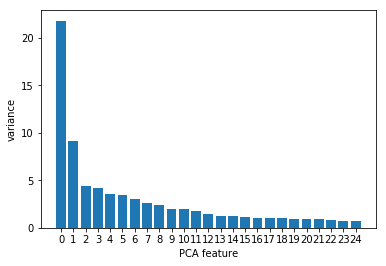

In [44]:
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

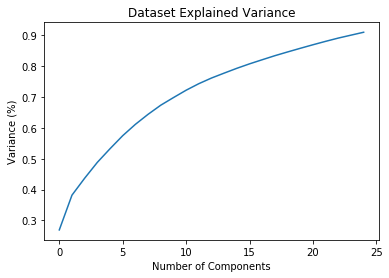

In [45]:
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Dataset Explained Variance')
plt.show()

In [46]:
vars = pca.explained_variance_ratio_
c_names = ['f1','f2','f3','f4','f5','f6','f7','f8','f9','f10',
           'f11','f12','f13','f14','f15','f16','f17','f18','f19','f20',
           'f21','f22','f23','f24','f25','f26','f27','f28','f29','f30',
           'f31','f32','f33','f34','f35','f36','f37','f38','f39','f40',
           'f41','f42','f43','f44','f45','f46','f47','f48','f49','f50',
           'f51','f52','f53','f54','f55','f56','f57','f58','f59','f60',
           'f61','f62','f63','f64','f65','f66','f67','f68','f69','f70',
           'f71','f72','f73','f74','f75','f76','f77','f78','f79','f80',
           'f81','f82']

print('Variance:  Projected dimension')
print('------------------------------')
for idx, row in enumerate(pca.components_):
    output = '{0:4.1f}%:    '.format(100.0 * vars[idx])
    output += " + ".join("{0:5.2f} * {1:s}".format(val, name) for val, name in zip(row, c_names))
    print(output)

Variance:  Projected dimension
------------------------------
26.9%:     0.18 * f1 +  0.02 * f2 +  0.06 * f3 + -0.01 * f4 + -0.12 * f5 +  0.13 * f6 + -0.01 * f7 +  0.15 * f8 + -0.03 * f9 +  0.10 * f10 +  0.11 * f11 + -0.02 * f12 +  0.04 * f13 +  0.11 * f14 +  0.14 * f15 +  0.20 * f16 +  0.18 * f17 + -0.09 * f18 +  0.12 * f19 +  0.14 * f20 + -0.01 * f21 +  0.17 * f22 +  0.17 * f23 +  0.08 * f24 +  0.15 * f25 +  0.07 * f26 + -0.09 * f27 +  0.00 * f28 +  0.15 * f29 +  0.15 * f30 +  0.10 * f31 +  0.01 * f32 + -0.03 * f33 + -0.01 * f34 +  0.18 * f35 +  0.00 * f36 + -0.12 * f37 +  0.18 * f38 + -0.02 * f39 +  0.18 * f40 +  0.18 * f41 +  0.15 * f42 +  0.05 * f43 +  0.16 * f44 + -0.02 * f45 +  0.09 * f46 +  0.08 * f47 +  0.14 * f48 + -0.07 * f49 +  0.09 * f50 + -0.01 * f51 +  0.04 * f52 +  0.05 * f53 +  0.11 * f54 + -0.01 * f55 + -0.01 * f56 + -0.01 * f57 + -0.01 * f58 +  0.05 * f59 +  0.17 * f60 + -0.09 * f61 +  0.19 * f62 +  0.15 * f63 +  0.06 * f64 +  0.17 * f65 +  0.10 * f66 +  0.12 * f67 +

In [47]:
pca = PCA(n_components=20)
reduced = pca.fit_transform(scaled)

In [48]:
reduced_df = pd.DataFrame.from_records(reduced)
reduced_df.insert(0, column='trend', value=clean_data.trend)
reduced_df['trend']=reduced_df['trend'].astype(np.int)
reduced_df.head()

,trend,0,1,2,3,4,5,6,7,8,...,10,11,12,13,14,15,16,17,18,19
0,0,-1.457071,-0.523728,-2.156216,-0.045154,-0.771425,0.655774,0.435635,-1.287651,0.709629,...,0.043738,0.058232,-0.142471,-0.552857,-0.047765,-0.955456,0.769690,0.263870,-1.241286,1.097445
1,0,-0.827453,-0.276551,-1.713066,0.047274,-0.450880,1.385299,0.706473,-1.452406,1.192144,...,0.515025,-0.174743,-0.766355,-1.187277,-0.585611,-1.267406,0.484515,0.443640,-0.580105,0.786000
2,1,1.492694,1.122087,-0.909513,0.232302,-0.346639,0.085384,-0.196430,-0.913378,0.359606,...,0.815817,0.108854,0.296950,-0.859227,-0.025868,-0.795227,0.278938,0.539054,-0.520791,-0.234904
3,1,2.321122,1.461731,-0.899096,0.089489,-0.041099,0.010702,-0.167971,-0.270415,0.134538,...,1.341069,-1.013491,0.150453,-1.014577,0.378935,-0.035479,-0.139811,0.141502,0.203001,-0.170075
4,1,0.679561,0.685771,0.538065,1.340784,0.640833,1.700319,-1.685896,1.122334,0.098372,...,0.672627,-0.647640,0.079995,1.259658,-1.086763,-1.020304,-0.737110,0.009530,-0.296795,0.750157


In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(reduced_df.iloc[:,1:], reduced_df['trend'], test_size=0.30, random_state=42)

## Logistic Regression

In [50]:
#lbfgs would not converge
#For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones.

logreg = LogisticRegression(solver='liblinear', max_iter=1000)
log_model = logreg.fit(X_train, Y_train)

log_Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
test_acc_log = round(logreg.score(X_test, Y_test) * 100, 2)

# Print roc_auc_score
print("Accuracy score (training):",acc_log)
print("Accuracy score (test):",test_acc_log)

Accuracy score (training): 89.99
Accuracy score (test): 91.18


In [51]:
from sklearn.metrics import f1_score, roc_auc_score

model=logreg

train_predictions = model.predict(X_train)

train_accuracy = roc_auc_score(Y_train, train_predictions)
train_error_rate = 1 - train_accuracy
test_accuracy = roc_auc_score(Y_test, log_Y_pred)
test_error_rate = 1 - test_accuracy
print('ROC Train Accuracy: {:.2f} | ROC Train Error: {:.2f}'.format(train_accuracy, train_error_rate))
print('ROC Test Accuracy: {:.2f} | ROC Test Error: {:.2f}'.format(test_accuracy, test_error_rate))

#error test > error train => OVER FITTING of the data.
#error test < error train => UNDER FITTING of the data

print('OVERFIT:',test_error_rate > train_error_rate)
print('UNDERFIT:',test_error_rate < train_error_rate)

from sklearn.metrics import classification_report
print(classification_report(Y_test, log_Y_pred))

from sklearn import metrics

log_f1 = f1_score(Y_test,log_Y_pred)

print('F1:',log_f1)

ROC Train Accuracy: 0.60 | ROC Train Error: 0.40
ROC Test Accuracy: 0.59 | ROC Test Error: 0.41
OVERFIT: True
UNDERFIT: False
              precision    recall  f1-score   support

           0       0.80      0.19      0.31        42
           1       0.91      0.99      0.95       366

   micro avg       0.91      0.91      0.91       408
   macro avg       0.86      0.59      0.63       408
weighted avg       0.90      0.91      0.89       408

F1: 0.9528795811518324


## K-Nearest Neighbors

In [52]:
knn = KNeighborsClassifier() 
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [53]:
from sklearn.model_selection import GridSearchCV

param_grid = { 
    'n_neighbors': [2, 5, 10, 50, 100],
    'p' : [1, 2],
    'leaf_size' :[30,50]
}

knn_CV = GridSearchCV(estimator=knn, param_grid=param_grid, cv= 10, n_jobs=-1)
knn_CV.fit(X_train, Y_train)

print(knn_CV.best_params_)
print(knn_CV.best_score_)

{'leaf_size': 30, 'n_neighbors': 10, 'p': 1}
0.8956796628029505


In [54]:
knn = KNeighborsClassifier(leaf_size=30, n_neighbors=10, p=1) 
knn_model = knn.fit(X_train, Y_train)  
knn_Y_pred = knn.predict(X_test)  

acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
test_acc_knn = round(knn.score(X_test, Y_test) * 100, 2)

# Print roc_auc_score
print("Accuracy score (training):",acc_knn)
print("Accuracy score (test):",test_acc_knn)

Accuracy score (training): 90.31
Accuracy score (test): 89.95


In [55]:
from sklearn.metrics import f1_score, roc_auc_score

model=knn

train_predictions = model.predict(X_train)

train_accuracy = roc_auc_score(Y_train, train_predictions)
train_error_rate = 1 - train_accuracy
test_accuracy = roc_auc_score(Y_test, knn_Y_pred)
test_error_rate = 1 - test_accuracy
print('ROC Train Accuracy: {:.2f} | ROC Train Error: {:.2f}'.format(train_accuracy, train_error_rate))
print('ROC Test Accuracy: {:.2f} | ROC Test Error: {:.2f}'.format(test_accuracy, test_error_rate))

#error test > error train => OVER FITTING of the data.
#error test < error train => UNDER FITTING of the data

print('OVERFIT:',test_error_rate > train_error_rate)
print('UNDERFIT:',test_error_rate < train_error_rate)

from sklearn.metrics import classification_report
print(classification_report(Y_test, knn_Y_pred))

from sklearn import metrics

knn_f1 = f1_score(Y_test,knn_Y_pred)

print('F1:',knn_f1)

ROC Train Accuracy: 0.62 | ROC Train Error: 0.38
ROC Test Accuracy: 0.58 | ROC Test Error: 0.42
OVERFIT: True
UNDERFIT: False
              precision    recall  f1-score   support

           0       0.54      0.17      0.25        42
           1       0.91      0.98      0.95       366

   micro avg       0.90      0.90      0.90       408
   macro avg       0.72      0.58      0.60       408
weighted avg       0.87      0.90      0.87       408

F1: 0.9461235216819973


## Gaussian Naive Bayes

In [56]:
gaussian = GaussianNB()
gaussian_model = gaussian.fit(X_train, Y_train) 

gaussian_Y_pred = gaussian.predict(X_test)  

acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
test_acc_gaussian = round(gaussian.score(X_test, Y_test) * 100, 2)

# Print roc_auc_score
print("Accuracy score (training):",acc_gaussian)
print("Accuracy score (test):",test_acc_gaussian)

Accuracy score (training): 43.1
Accuracy score (test): 32.6


In [57]:
from sklearn.metrics import f1_score, roc_auc_score

model=gaussian

train_predictions = model.predict(X_train)

train_accuracy = roc_auc_score(Y_train, train_predictions)
train_error_rate = 1 - train_accuracy
test_accuracy = roc_auc_score(Y_test, gaussian_Y_pred)
test_error_rate = 1 - test_accuracy
print('ROC Train Accuracy: {:.2f} | ROC Train Error: {:.2f}'.format(train_accuracy, train_error_rate))
print('ROC Test Accuracy: {:.2f} | ROC Test Error: {:.2f}'.format(test_accuracy, test_error_rate))

#error test > error train => OVER FITTING of the data.
#error test < error train => UNDER FITTING of the data

print('OVERFIT:',test_error_rate > train_error_rate)
print('UNDERFIT:',test_error_rate < train_error_rate)

from sklearn.metrics import classification_report
print(classification_report(Y_test, gaussian_Y_pred))

gaussian_f1 = f1_score(Y_test,gaussian_Y_pred)

from sklearn import metrics
print('F1:',gaussian_f1)

ROC Train Accuracy: 0.59 | ROC Train Error: 0.41
ROC Test Accuracy: 0.54 | ROC Test Error: 0.46
OVERFIT: True
UNDERFIT: False
              precision    recall  f1-score   support

           0       0.11      0.81      0.20        42
           1       0.93      0.27      0.42       366

   micro avg       0.33      0.33      0.33       408
   macro avg       0.52      0.54      0.31       408
weighted avg       0.84      0.33      0.40       408

F1: 0.4186046511627908


## Support Vector Classifier (SVC)

In [58]:
svc = SVC(kernel='rbf', gamma='auto')
svc_model = svc.fit(X_train, Y_train)

svc_Y_pred = svc.predict(X_test)

acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
test_acc_svc = round(svc.score(X_test, Y_test) * 100, 2)

# Print roc_auc_score
print("Accuracy score (training):",acc_svc)
print("Accuracy score (test):",test_acc_svc)

Accuracy score (training): 91.04
Accuracy score (test): 89.95


In [59]:
from sklearn.metrics import f1_score, roc_auc_score

model=svc

train_predictions = model.predict(X_train)

train_accuracy = roc_auc_score(Y_train, train_predictions)
train_error_rate = 1 - train_accuracy
test_accuracy = roc_auc_score(Y_test, svc_Y_pred)
test_error_rate = 1 - test_accuracy
print('ROC Train Accuracy: {:.2f} | ROC Train Error: {:.2f}'.format(train_accuracy, train_error_rate))
print('ROC Test Accuracy: {:.2f} | ROC Test Error: {:.2f}'.format(test_accuracy, test_error_rate))

#error test > error train => OVER FITTING of the data.
#error test < error train => UNDER FITTING of the data

print('OVERFIT:',test_error_rate > train_error_rate)
print('UNDERFIT:',test_error_rate < train_error_rate)

from sklearn.metrics import classification_report
print(classification_report(Y_test, svc_Y_pred))

svc_f1 = f1_score(Y_test,svc_Y_pred)

from sklearn import metrics
print('F1:',svc_f1)

ROC Train Accuracy: 0.64 | ROC Train Error: 0.36
ROC Test Accuracy: 0.52 | ROC Test Error: 0.48
OVERFIT: True
UNDERFIT: False
              precision    recall  f1-score   support

           0       0.67      0.05      0.09        42
           1       0.90      1.00      0.95       366

   micro avg       0.90      0.90      0.90       408
   macro avg       0.78      0.52      0.52       408
weighted avg       0.88      0.90      0.86       408

F1: 0.9468223086900129


## Decision Trees

In [60]:
decision_tree = DecisionTreeClassifier() 
decision_tree.get_params().keys()

dict_keys(['class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'presort', 'random_state', 'splitter'])

In [61]:
from sklearn.model_selection import GridSearchCV

depths = np.arange(1, 21)

param_grid = { 
    'criterion': ['gini', 'entropy'],
    'max_depth' : depths,
    'min_samples_leaf' :[1, 5, 10, 20, 50, 100]
}

decision_tree_CV = GridSearchCV(estimator=decision_tree, param_grid=param_grid, cv= 10, n_jobs=-1)
decision_tree_CV.fit(X_train, Y_train)

print(decision_tree_CV.best_params_)
print(decision_tree_CV.best_score_)

{'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 20}
0.880927291886196


C:\Users\Sasha\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [62]:
decision_tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=20) 
decision_tree_model = decision_tree.fit(X_train, Y_train)  
decision_tree_Y_pred = decision_tree.predict(X_test)  

acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
test_acc_decision_tree = round(decision_tree.score(X_test, Y_test) * 100, 2)

# Print roc_auc_score
print("Accuracy score (training):",acc_decision_tree)
print("Accuracy score (test):",test_acc_decision_tree)

Accuracy score (training): 89.15
Accuracy score (test): 89.71


In [63]:
from sklearn.metrics import f1_score, roc_auc_score

model=decision_tree

train_predictions = model.predict(X_train)

train_accuracy = roc_auc_score(Y_train, train_predictions)
train_error_rate = 1 - train_accuracy
test_accuracy = roc_auc_score(Y_test, decision_tree_Y_pred)
test_error_rate = 1 - test_accuracy
print('ROC Train Accuracy: {:.2f} | ROC Train Error: {:.2f}'.format(train_accuracy, train_error_rate))
print('ROC Test Accuracy: {:.2f} | ROC Test Error: {:.2f}'.format(test_accuracy, test_error_rate))

#error test > error train => OVER FITTING of the data.
#error test < error train => UNDER FITTING of the data

print('OVERFIT:',test_error_rate > train_error_rate)
print('UNDERFIT:',test_error_rate < train_error_rate)

from sklearn.metrics import classification_report
print(classification_report(Y_test, decision_tree_Y_pred))

dt_f1 = f1_score(Y_test,decision_tree_Y_pred)

from sklearn import metrics
print('F1:',dt_f1)

ROC Train Accuracy: 0.57 | ROC Train Error: 0.43
ROC Test Accuracy: 0.54 | ROC Test Error: 0.46
OVERFIT: True
UNDERFIT: False
              precision    recall  f1-score   support

           0       0.50      0.10      0.16        42
           1       0.91      0.99      0.95       366

   micro avg       0.90      0.90      0.90       408
   macro avg       0.70      0.54      0.55       408
weighted avg       0.86      0.90      0.86       408

F1: 0.9451697127937337


## Ensemble Methods

### AdaBoost

In [64]:
decision_tree = DecisionTreeClassifier()
ada = AdaBoostClassifier(base_estimator=decision_tree, n_estimators=180, random_state=1)
ada_model = ada.fit(X_train, Y_train)

ada_Y_pred = ada.predict(X_test)

acc_ada = round(ada.score(X_train, Y_train) * 100, 2)
test_acc_ada = round(ada.score(X_test, Y_test) * 100, 2)

# Print roc_auc_score
print("Accuracy score (training):",acc_ada)
print("Accuracy score (test):",test_acc_ada)

Accuracy score (training): 100.0
Accuracy score (test): 83.58


In [65]:
from sklearn.metrics import f1_score, roc_auc_score

model=ada

train_predictions = model.predict(X_train)

train_accuracy = roc_auc_score(Y_train, train_predictions)
train_error_rate = 1 - train_accuracy
test_accuracy = roc_auc_score(Y_test, ada_Y_pred)
test_error_rate = 1 - test_accuracy
print('ROC Train Accuracy: {:.2f} | ROC Train Error: {:.2f}'.format(train_accuracy, train_error_rate))
print('ROC Test Accuracy: {:.2f} | ROC Test Error: {:.2f}'.format(test_accuracy, test_error_rate))

#error test > error train => OVER FITTING of the data.
#error test < error train => UNDER FITTING of the data

print('OVERFIT:',test_error_rate > train_error_rate)
print('UNDERFIT:',test_error_rate < train_error_rate)

from sklearn.metrics import classification_report
print(classification_report(Y_test, ada_Y_pred))

ada_f1 = f1_score(Y_test,ada_Y_pred)

from sklearn import metrics
print('F1:',ada_f1)

ROC Train Accuracy: 1.00 | ROC Train Error: 0.00
ROC Test Accuracy: 0.59 | ROC Test Error: 0.41
OVERFIT: True
UNDERFIT: False
              precision    recall  f1-score   support

           0       0.24      0.29      0.26        42
           1       0.92      0.90      0.91       366

   micro avg       0.84      0.84      0.84       408
   macro avg       0.58      0.59      0.59       408
weighted avg       0.85      0.84      0.84       408

F1: 0.9075862068965518


### Gradient Tree Boosting

In [66]:
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(n_estimators=20, learning_rate = learning_rate, max_features=2, max_depth = 2, random_state = 0)
    gt_model = gb.fit(X_train, Y_train)
    
    acc_gb = round(gb.score(X_train, Y_train) * 100, 2)
    test_acc_gb = round(gb.score(X_test, Y_test) * 100, 2)
    
    gb_Y_pred = gb.predict(X_test)
    
print("Learning rate: ", learning_rate)
print("Accuracy score (training):",acc_gb)
print("Accuracy score (test):",test_acc_gb)

Learning rate:  1
Accuracy score (training): 94.94
Accuracy score (test): 87.99


In [67]:
from sklearn.metrics import f1_score, roc_auc_score

model=gb

train_predictions = model.predict(X_train)

train_accuracy = roc_auc_score(Y_train, train_predictions)
train_error_rate = 1 - train_accuracy
test_accuracy = roc_auc_score(Y_test, gb_Y_pred)
test_error_rate = 1 - test_accuracy
print('ROC Train Accuracy: {:.2f} | ROC Train Error: {:.2f}'.format(train_accuracy, train_error_rate))
print('ROC Test Accuracy: {:.2f} | ROC Test Error: {:.2f}'.format(test_accuracy, test_error_rate))

#error test > error train => OVER FITTING of the data.
#error test < error train => UNDER FITTING of the data

print('OVERFIT:',test_error_rate > train_error_rate)
print('UNDERFIT:',test_error_rate < train_error_rate)

from sklearn.metrics import classification_report
print(classification_report(Y_test, gb_Y_pred))

gb_f1 = f1_score(Y_test,gb_Y_pred)

from sklearn import metrics
print('F1:',gb_f1)

ROC Train Accuracy: 0.82 | ROC Train Error: 0.18
ROC Test Accuracy: 0.61 | ROC Test Error: 0.39
OVERFIT: True
UNDERFIT: False
              precision    recall  f1-score   support

           0       0.38      0.26      0.31        42
           1       0.92      0.95      0.93       366

   micro avg       0.88      0.88      0.88       408
   macro avg       0.65      0.61      0.62       408
weighted avg       0.86      0.88      0.87       408

F1: 0.934228187919463


### Random Forest

In [68]:
random_forest = RandomForestClassifier()
random_forest.get_params().keys()

dict_keys(['bootstrap', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [69]:
from sklearn.model_selection import GridSearchCV

depths = np.arange(1, 21)

param_grid = { 
    'n_estimators': [100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : depths,
    'criterion' :['gini', 'entropy']
}

rf_CV = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv= 5, n_jobs=-1)
rf_CV.fit(X_train, Y_train)

print(rf_CV.best_params_)
print(rf_CV.best_score_)

{'criterion': 'gini', 'max_depth': 12, 'max_features': 'sqrt', 'n_estimators': 100}
0.9020021074815595


In [70]:
random_forest = RandomForestClassifier(criterion='gini', max_depth=12, max_features='sqrt', n_estimators=100)
random_forest_model = random_forest.fit(X_train, Y_train)

random_Y_pred = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
test_acc_random_forest = round(random_forest.score(X_test, Y_test) * 100, 2)

# Print roc_auc_score
print("Accuracy score (training):",acc_random_forest)
print("Accuracy score (test):",test_acc_random_forest)

Accuracy score (training): 99.79
Accuracy score (test): 90.44


In [71]:
from sklearn.metrics import f1_score, roc_auc_score

model=random_forest

train_predictions = model.predict(X_train)

train_accuracy = roc_auc_score(Y_train, train_predictions)
train_error_rate = 1 - train_accuracy
test_accuracy = roc_auc_score(Y_test, random_Y_pred)
test_error_rate = 1 - test_accuracy
print('ROC Train Accuracy: {:.2f} | ROC Train Error: {:.2f}'.format(train_accuracy, train_error_rate))
print('ROC Test Accuracy: {:.2f} | ROC Test Error: {:.2f}'.format(test_accuracy, test_error_rate))

#error test > error train => OVER FITTING of the data.
#error test < error train => UNDER FITTING of the data

print('OVERFIT:',test_error_rate > train_error_rate)
print('UNDERFIT:',test_error_rate < train_error_rate)

from sklearn.metrics import classification_report
print(classification_report(Y_test, random_Y_pred))

rf_f1 = f1_score(Y_test,random_Y_pred)

from sklearn import metrics
print('F1:',rf_f1)

ROC Train Accuracy: 0.99 | ROC Train Error: 0.01
ROC Test Accuracy: 0.57 | ROC Test Error: 0.43
OVERFIT: True
UNDERFIT: False
              precision    recall  f1-score   support

           0       0.67      0.14      0.24        42
           1       0.91      0.99      0.95       366

   micro avg       0.90      0.90      0.90       408
   macro avg       0.79      0.57      0.59       408
weighted avg       0.88      0.90      0.88       408

F1: 0.9490196078431372


In [72]:
# Feature Importance
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
0,0.087
1,0.075
17,0.074
2,0.070
10,0.068
13,0.056
4,0.055
9,0.051
8,0.044


## Stochastic Gradient Descent (SGD)

In [73]:
sgd = linear_model.SGDClassifier()
sgd.get_params().keys()

dict_keys(['alpha', 'average', 'class_weight', 'early_stopping', 'epsilon', 'eta0', 'fit_intercept', 'l1_ratio', 'learning_rate', 'loss', 'max_iter', 'n_iter', 'n_iter_no_change', 'n_jobs', 'penalty', 'power_t', 'random_state', 'shuffle', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [74]:
from sklearn.model_selection import GridSearchCV

param_grid = { 
    'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'],
    'penalty': ['l1', 'l2'],
}

sgd_CV = GridSearchCV(estimator=sgd, param_grid=param_grid, cv= 5, n_jobs=-1)
sgd_CV.fit(X_train, Y_train)

print(sgd_CV.best_params_)
print(sgd_CV.best_score_)

{'loss': 'log', 'penalty': 'l2'}
0.8977871443624869


C:\Users\Sasha\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Sasha\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


In [75]:
sgd = linear_model.SGDClassifier(loss='log', penalty='l2',max_iter=1000)
sgd_model = sgd.fit(X_train, Y_train)
sgd_Y_pred = sgd.predict(X_test)

sgd.score(X_train, Y_train)

acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
test_acc_sgd = round(sgd.score(X_test, Y_test) * 100, 2)

# Print roc_auc_score
print("Accuracy score (training):",acc_sgd)
print("Accuracy score (test):",test_acc_sgd)

Accuracy score (training): 90.41
Accuracy score (test): 91.42


In [76]:
from sklearn.metrics import f1_score, roc_auc_score

model=sgd

train_predictions = model.predict(X_train)

train_accuracy = roc_auc_score(Y_train, train_predictions)
train_error_rate = 1 - train_accuracy
test_accuracy = roc_auc_score(Y_test, sgd_Y_pred)
test_error_rate = 1 - test_accuracy
print('ROC Train Accuracy: {:.2f} | ROC Train Error: {:.2f}'.format(train_accuracy, train_error_rate))
print('ROC Test Accuracy: {:.2f} | ROC Test Error: {:.2f}'.format(test_accuracy, test_error_rate))

#error test > error train => OVER FITTING of the data.
#error test < error train => UNDER FITTING of the data

print('OVERFIT:',test_error_rate > train_error_rate)
print('UNDERFIT:',test_error_rate < train_error_rate)

from sklearn.metrics import classification_report
print(classification_report(Y_test, sgd_Y_pred))

sgd_f1 = f1_score(Y_test,sgd_Y_pred)

from sklearn import metrics
print('F1:',sgd_f1)

ROC Train Accuracy: 0.61 | ROC Train Error: 0.39
ROC Test Accuracy: 0.59 | ROC Test Error: 0.41
OVERFIT: True
UNDERFIT: False
              precision    recall  f1-score   support

           0       0.89      0.19      0.31        42
           1       0.91      1.00      0.95       366

   micro avg       0.91      0.91      0.91       408
   macro avg       0.90      0.59      0.63       408
weighted avg       0.91      0.91      0.89       408

F1: 0.954248366013072


## Perceptron

In [77]:
perceptron = Perceptron(max_iter=5)
perceptron_model = perceptron.fit(X_train, Y_train)

perceptron_Y_pred = perceptron.predict(X_test)

acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
test_acc_perceptron = round(perceptron.score(X_test, Y_test) * 100, 2)

# Print roc_auc_score
print("Accuracy score (training):",acc_perceptron)
print("Accuracy score (test):",test_acc_perceptron)

Accuracy score (training): 87.67
Accuracy score (test): 87.99


In [78]:
from sklearn.metrics import f1_score, roc_auc_score

model=perceptron

train_predictions = model.predict(X_train)

train_accuracy = roc_auc_score(Y_train, train_predictions)
train_error_rate = 1 - train_accuracy
test_accuracy = roc_auc_score(Y_test, perceptron_Y_pred)
test_error_rate = 1 - test_accuracy
print('ROC Train Accuracy: {:.2f} | ROC Train Error: {:.2f}'.format(train_accuracy, train_error_rate))
print('ROC Test Accuracy: {:.2f} | ROC Test Error: {:.2f}'.format(test_accuracy, test_error_rate))

#error test > error train => OVER FITTING of the data.
#error test < error train => UNDER FITTING of the data

print('OVERFIT:',test_error_rate > train_error_rate)
print('UNDERFIT:',test_error_rate < train_error_rate)

from sklearn.metrics import classification_report
print(classification_report(Y_test, perceptron_Y_pred))

perceptron_f1 = f1_score(Y_test,perceptron_Y_pred)

from sklearn import metrics
print('F1:',perceptron_f1)

ROC Train Accuracy: 0.61 | ROC Train Error: 0.39
ROC Test Accuracy: 0.56 | ROC Test Error: 0.44
OVERFIT: True
UNDERFIT: False
              precision    recall  f1-score   support

           0       0.33      0.17      0.22        42
           1       0.91      0.96      0.93       366

   micro avg       0.88      0.88      0.88       408
   macro avg       0.62      0.56      0.58       408
weighted avg       0.85      0.88      0.86       408

F1: 0.9349269588313414


## COMPARE

In [79]:
results = pd.DataFrame({
    'Model': ['Logistic Regression','K-Nearest Neighbors',
             'Gaussian Naive Bayes','Support Vector Classifier (SVC)',
             'Decision Trees','AdaBoost','Gradient Tree Boosting',
             'Random Forest','Stochastic Gradient Descent (SGD)','Perceptron'],
    'Score': [test_acc_log,
              test_acc_knn,
              test_acc_gaussian,
              test_acc_svc,
              test_acc_decision_tree,
              test_acc_ada,
              test_acc_gb,
              test_acc_random_forest,
              test_acc_sgd,
              test_acc_perceptron],
    'F1': [round(log_f1, 2),
                round(knn_f1, 2),
                round(gaussian_f1, 2),
                round(svc_f1, 2),
                round(dt_f1, 2),
                round(ada_f1, 2),
                round(gb_f1, 2),
                round(rf_f1, 2),
                round(sgd_f1, 2),
                round(perceptron_f1, 2)
                ]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df

,Model,F1
Score,,
91.42,Stochastic Gradient Descent (SGD),0.95
91.18,Logistic Regression,0.95
90.44,Random Forest,0.95
89.95,K-Nearest Neighbors,0.95
89.95,Support Vector Classifier (SVC),0.95
89.71,Decision Trees,0.95
87.99,Gradient Tree Boosting,0.93
87.99,Perceptron,0.93
83.58,AdaBoost,0.91


# Attempt to improve Random Forest w/ SMOTE

In [124]:
clean_data3=clean_data.copy()
clean_data3.head()

,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,Cash and Cash Equivalents,Changes in Inventories,Common Stocks,...,For Year,Estimated Shares Outstanding,open,close,low,high,volume,GICS Sector,GICS Sub Industry,trend
0,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,1.330000e+09,0.0,127000000.0,...,2012,3.350000e+08,12.850000,13.500000,12.840000,13.680000,7005600.0,5,4,0.0
1,4.975000e+09,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,2.175000e+09,0.0,5000000.0,...,2013,1.630222e+08,24.740000,25.250000,24.629999,25.250000,7166600.0,5,4,0.0
2,4.668000e+09,-160000000.0,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,60.0,1.768000e+09,0.0,7000000.0,...,2014,7.169154e+08,53.900002,53.630001,53.320000,54.639999,10626000.0,5,4,1.0
3,5.102000e+09,352000000.0,-7.080000e+08,135.0,-6.151000e+09,1.159100e+10,51.0,1.085000e+09,0.0,6000000.0,...,2015,6.681299e+08,42.540001,42.349998,41.830002,42.570000,6788900.0,5,4,1.0
4,6.448000e+09,681000000.0,-5.400000e+07,92.0,-4.910000e+08,3.671000e+09,144.0,9.595000e+09,-56000000.0,16000000.0,...,2013,1.600000e+09,52.990002,52.810001,52.360001,53.060001,3019700.0,4,87,1.0


In [125]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(clean_data3.loc[:, clean_data3.columns != 'trend'], clean_data3['trend'], test_size=0.30, random_state=42)

In [131]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=45, ratio = .4)
x_train_res, y_train_res = sm.fit_sample(X_train, Y_train)

In [132]:
random_forest = RandomForestClassifier()
random_forest.get_params().keys()

dict_keys(['bootstrap', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [133]:
from sklearn.model_selection import GridSearchCV

depths = np.arange(1, 21)

param_grid = { 
    'n_estimators': [100, 200],
    'max_depth' : depths,
    'criterion' :['gini', 'entropy']
}

rf_CV = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv= 5, n_jobs=-1)
rf_CV.fit(x_train_res, y_train_res)

print(rf_CV.best_params_)
print(rf_CV.best_score_)

{'criterion': 'entropy', 'max_depth': 18, 'n_estimators': 100}
0.9853951890034365


In [134]:
random_forest = RandomForestClassifier(criterion='entropy', max_depth=18, max_features='auto', n_estimators=100)
random_forest_model = random_forest.fit(X_train, Y_train)

random_Y_pred = random_forest.predict(X_test)

random_forest.score(x_train_res, y_train_res)
acc_random_forest = round(random_forest.score(x_train_res, y_train_res) * 100, 2)
test_acc_random_forest = round(random_forest.score(X_test, Y_test) * 100, 2)

# Print roc_auc_score
print("Accuracy score (training):",acc_random_forest)
print("Accuracy score (test):",test_acc_random_forest)

Accuracy score (training): 97.51
Accuracy score (test): 99.26


In [135]:
from sklearn.metrics import f1_score, roc_auc_score

model=random_forest

train_predictions = model.predict(x_train_res)

train_accuracy = roc_auc_score(y_train_res, train_predictions)
train_error_rate = 1 - train_accuracy
test_accuracy = roc_auc_score(Y_test, random_Y_pred)
test_error_rate = 1 - test_accuracy
print('ROC Train Accuracy: {:.2f} | ROC Train Error: {:.2f}'.format(train_accuracy, train_error_rate))
print('ROC Test Accuracy: {:.2f} | ROC Test Error: {:.2f}'.format(test_accuracy, test_error_rate))

#error test > error train => OVER FITTING of the data.
#error test < error train => UNDER FITTING of the data

print('OVERFIT:',test_error_rate > train_error_rate)
print('UNDERFIT:',test_error_rate < train_error_rate)

from sklearn.metrics import classification_report
print(classification_report(Y_test, random_Y_pred))

rf_f1 = f1_score(Y_test,random_Y_pred)

from sklearn import metrics
print('F1:',rf_f1)

ROC Train Accuracy: 0.96 | ROC Train Error: 0.04
ROC Test Accuracy: 0.99 | ROC Test Error: 0.01
OVERFIT: False
UNDERFIT: True
              precision    recall  f1-score   support

         0.0       0.95      0.98      0.96        42
         1.0       1.00      0.99      1.00       366

   micro avg       0.99      0.99      0.99       408
   macro avg       0.98      0.99      0.98       408
weighted avg       0.99      0.99      0.99       408

F1: 0.9958960328317372


In [136]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold, StratifiedKFold, ShuffleSplit

# cross-validation
# cv = KFold(n_splits=3, shuffle=True) # shuffle and divide in 3 equal parts
cv = StratifiedKFold(n_splits=10, shuffle=True) # KFold with 'stratify' option
# # test_size is available in ShuffleSplit
# cv = ShuffleSplit(n_splits=3, test_size=0.2)
scores = cross_val_score(model, X_test, Y_test, cv=cv)
print("Mean score:", np.mean(scores))

Mean score: 0.9681620209059233
